In [588]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import xlrd 
import json
import seaborn as sns
import statsmodels.api as sm



In [589]:
#import data from url to get the state abbr
url="http://worldpopulationreview.com/static/states/name-abbr.json"
d = requests.get(url).json()

states_abbr = pd.DataFrame(d.items() , columns=["State","State Abbr"])

states_abbr.head()

,State,State Abbr
0,Alabama,AL
1,Alaska,AK
2,American Samoa,AS
3,Arizona,AZ
4,Arkansas,AR


In [590]:
#import excel file with obesity, unemployment, education
xls = pd.ExcelFile('Resources/2016 County Health Rankings Data - v3.xls')
df = pd.read_excel(xls, 'Ranked Measure Data', skiprows=1)


In [591]:
df.head()


,FIPS,State,County,# Deaths,Years of Potential Life Lost Rate,95% CI - Low,95% CI - High,Quartile,% Fair/Poor,95% CI - Low.1,...,# Workers,% Drive Alone,95% CI - Low.20,95% CI - High.20,Quartile.33,# Workers who Drive Alone,% Long Commute - Drives Alone,95% CI - Low.21,95% CI - High.21,Quartile.34
0,1001.0,Alabama,Autauga,809.0,9215.1,8307.8,10122.3,2,19.4,18.8,...,24290.0,89.230136,87.152547,91.307725,4,21674.0,41.7,37.996787,45.403213,3
1,1003.0,Alabama,Baldwin,2506.0,7454.6,7001.9,7907.3,1,16.0,15.6,...,82134.0,84.071152,82.543906,85.598398,2,69051.0,36.8,34.609473,38.990527,3
2,1005.0,Alabama,Barbour,410.0,8499.9,7256.9,9742.8,1,25.7,25.0,...,9108.0,83.519982,81.092529,85.947436,2,7607.0,35.1,29.689536,40.510464,2
3,1007.0,Alabama,Bibb,414.0,11007.7,9346.3,12669.1,3,22.0,21.3,...,7773.0,84.034478,80.071760,87.997196,2,6532.0,45.7,38.399757,53.000243,4
4,1009.0,Alabama,Blount,876.0,8655.9,7799.8,9512.0,1,20.7,20.0,...,22168.0,85.073078,82.839898,87.306258,3,18859.0,59.0,54.229577,63.770423,4


In [592]:
#rename columns used for analysis as only the subheaders remained when first row was skipped above
df.rename(columns={ df.columns[108]: "Unemployment Percent" }, inplace = True)
df.rename(columns={ df.columns[31]: "Obesity Percent" }, inplace = True)
df.rename(columns={ df.columns[102]: "Some College Percent" }, inplace = True)
df.rename(columns={ df.columns[98]: "High School Grad Percent" }, inplace = True)


#merge data into new dataframe
stats_df = pd.merge(states_abbr, df,
                                 how='left', on='State')

stats_df.head()


,State,State Abbr,FIPS,County,# Deaths,Years of Potential Life Lost Rate,95% CI - Low,95% CI - High,Quartile,% Fair/Poor,...,# Workers,% Drive Alone,95% CI - Low.20,95% CI - High.20,Quartile.33,# Workers who Drive Alone,% Long Commute - Drives Alone,95% CI - Low.21,95% CI - High.21,Quartile.34
0,Alabama,AL,1001.0,Autauga,809.0,9215.1,8307.8,10122.3,2,19.4,...,24290.0,89.230136,87.152547,91.307725,4,21674.0,41.7,37.996787,45.403213,3
1,Alabama,AL,1003.0,Baldwin,2506.0,7454.6,7001.9,7907.3,1,16.0,...,82134.0,84.071152,82.543906,85.598398,2,69051.0,36.8,34.609473,38.990527,3
2,Alabama,AL,1005.0,Barbour,410.0,8499.9,7256.9,9742.8,1,25.7,...,9108.0,83.519982,81.092529,85.947436,2,7607.0,35.1,29.689536,40.510464,2
3,Alabama,AL,1007.0,Bibb,414.0,11007.7,9346.3,12669.1,3,22.0,...,7773.0,84.034478,80.071760,87.997196,2,6532.0,45.7,38.399757,53.000243,4
4,Alabama,AL,1009.0,Blount,876.0,8655.9,7799.8,9512.0,1,20.7,...,22168.0,85.073078,82.839898,87.306258,3,18859.0,59.0,54.229577,63.770423,4


In [593]:
#clean up data to show only stats in comparision
Unemployment_Percent=stats_df["Unemployment Percent"]
Obesity_Percent=stats_df["Obesity Percent"]
Some_College=stats_df["Some College Percent"]
High_School=stats_df["High School Grad Percent"]
State_Name=stats_df["State"]
County=stats_df["County"]
state_abbr=stats_df["State Abbr"]

#create new Dataframe with just information needed
formatted_df= pd.DataFrame({"State": State_Name,
                        "State Abbr": state_abbr,
                        "County": County,
                        "Unemployment (%)": Unemployment_Percent,
                        "Obesity (%)": Obesity_Percent,
                        "Some College (%)": Some_College,
                        "High School Graduate (%)": High_School
                       })

formatted_df.head()

,State,State Abbr,County,Unemployment (%),Obesity (%),Some College (%),High School Graduate (%)
0,Alabama,AL,Autauga,5.883047,30.9,56.470750,83.000000
1,Alabama,AL,Baldwin,6.053720,26.7,62.335918,80.000000
2,Alabama,AL,Barbour,10.809275,40.8,43.358568,80.530303
3,Alabama,AL,Bibb,7.137850,40.1,48.927875,81.000000
4,Alabama,AL,Blount,6.146908,32.4,49.149934,84.975362


In [594]:
#import excel file containing the income per capita by county
income_xl = pd.ExcelFile('Resources/county income level PROJECT.xlsx')
income_df = pd.read_excel(income_xl, skiprows = [1,2,3,4,5,6,])
income_df.head()

,Unnamed: 0,"Table 1. Per Capita Personal Income by County, 2015 - 2017",Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Alabama,Autauga,38591.0,39509.0,40484.0,9,2.4,2.5,67
1,Alabama,Baldwin,41412.0,43004.0,44079.0,4,3.8,2.5,66
2,Alabama,Barbour,31509.0,31750.0,33453.0,46,0.8,5.4,11
3,Alabama,Bibb,29048.0,28989.0,30022.0,66,-0.2,3.6,47
4,Alabama,Blount,31987.0,32261.0,33707.0,45,0.9,4.5,19


In [595]:
#renaming headers
income_df.rename(columns={ income_df.columns[2]: "2015($)" }, inplace = True)
income_df.rename(columns={ income_df.columns[3]: "2016($)" }, inplace = True)
income_df.rename(columns={ income_df.columns[4]: "2017($)" }, inplace = True)
income_df.rename(columns = {income_df.columns[0]: "State"}, inplace = True)
income_df.rename(columns = {income_df.columns[1]: "County"}, inplace = True)

income_df.head()

,State,County,2015($),2016($),2017($),Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Alabama,Autauga,38591.0,39509.0,40484.0,9,2.4,2.5,67
1,Alabama,Baldwin,41412.0,43004.0,44079.0,4,3.8,2.5,66
2,Alabama,Barbour,31509.0,31750.0,33453.0,46,0.8,5.4,11
3,Alabama,Bibb,29048.0,28989.0,30022.0,66,-0.2,3.6,47
4,Alabama,Blount,31987.0,32261.0,33707.0,45,0.9,4.5,19


In [596]:
#referencing data needed for 2016 analysis and creating new dataframe
year2016_data = income_df["2016($)"]
income_state_name=income_df["State"]
income_county=income_df["County"]

rename_income_df= pd.DataFrame({"State": income_state_name,
                        "County": income_county,
                        "Income Per Capita 2016 ($)": year2016_data,
                       })
rename_income_df.head()

,State,County,Income Per Capita 2016 ($)
0,Alabama,Autauga,39509.0
1,Alabama,Baldwin,43004.0
2,Alabama,Barbour,31750.0
3,Alabama,Bibb,28989.0
4,Alabama,Blount,32261.0


In [597]:
#merging the health and income data into a new dataframe
merge_states_info = pd.merge(formatted_df, rename_income_df, 
                             right_on=["State", "County"], left_on = ["State", "County"])
merge_states_info.head()

,State,State Abbr,County,Unemployment (%),Obesity (%),Some College (%),High School Graduate (%),Income Per Capita 2016 ($)
0,Alabama,AL,Autauga,5.883047,30.9,56.470750,83.000000,39509.0
1,Alabama,AL,Baldwin,6.053720,26.7,62.335918,80.000000,43004.0
2,Alabama,AL,Barbour,10.809275,40.8,43.358568,80.530303,31750.0
3,Alabama,AL,Bibb,7.137850,40.1,48.927875,81.000000,28989.0
4,Alabama,AL,Blount,6.146908,32.4,49.149934,84.975362,32261.0


In [598]:
#inporting SNAP recepient data from excel 
SNAP = pd.ExcelFile('Resources/cntysnap.xls')
SNAP_df = pd.read_excel(SNAP, skiprows=2)
SNAP_df = SNAP_df.join(SNAP_df["Name"].str.split(",", 1, expand=True).rename(columns={0:'County', 1:'State Abbr'}))
SNAP_df["County"] = SNAP_df["County"].str.replace("County", "")
SNAP_df.head()

,State FIPS code,County FIPS code,Name,July 2016,July 2015,July 2014,July 2013,July 2012,July 2011,July 2010,...,July 2001,July 2000,July 1999,July 1998,July 1997,July 1995,July 1993,July 1989,County,State Abbr
0,1,0,Alabama,813769.0,864350.0,893684.0,905604.0,914740.0,905658.0,859695.0,...,435235.0,405325.0,396931.0,409160.0,434632.0,510271.0,561128.0,435296.0,Alabama,None
1,1,1,"Autauga County, AL",7844.0,8015.0,8145.0,8055.0,8079.0,8060.0,7593.0,...,3035.0,2814.0,2700.0,2589.0,2771.0,3611.0,4608.0,3739.0,Autauga,AL
2,1,3,"Baldwin County, AL",21406.0,22920.0,24563.0,24402.0,23169.0,22184.0,20604.0,...,4129.0,4178.0,4372.0,4850.0,5201.0,6928.0,8053.0,5548.0,Baldwin,AL
3,1,5,"Barbour County, AL",6675.0,6730.0,6725.0,6740.0,6843.0,6465.0,6324.0,...,4637.0,4415.0,4490.0,4788.0,4947.0,5268.0,5499.0,5056.0,Barbour,AL
4,1,7,"Bibb County, AL",3740.0,3794.0,4085.0,4175.0,4269.0,4336.0,4152.0,...,1765.0,1685.0,1631.0,1776.0,1999.0,2085.0,2503.0,2056.0,Bibb,AL


In [599]:
#referencing data needed for 2016 analysis and creating new dataframe
reduced_SNAP_df = SNAP_df.loc[:, ["State Abbr", "County", "July 2016"]]
reduced_SNAP_df.rename(columns={"July 2016": "SNAP Recipents (2016)"}, inplace=True)
reduced_SNAP_df = reduced_SNAP_df[reduced_SNAP_df["State Abbr"].astype(str) != "None"]

reduced_SNAP_df.head()

,State Abbr,County,SNAP Recipents (2016)
1,AL,Autauga,7844.0
2,AL,Baldwin,21406.0
3,AL,Barbour,6675.0
4,AL,Bibb,3740.0
5,AL,Blount,7037.0


In [600]:
#removing space after data to so it can be merged into new dataframe
reduced_SNAP_df['State Abbr'] = reduced_SNAP_df['State Abbr'].str.strip()
reduced_SNAP_df['County'] = reduced_SNAP_df['County'].str.strip()
merge_states_info['State Abbr'] = merge_states_info['State Abbr'].str.strip()
merge_states_info['County'] = merge_states_info['County'].str.strip()
#Merging data
all_merged_df = pd.merge(merge_states_info, reduced_SNAP_df, 
                         right_on = ["State Abbr","County"], left_on = ["State Abbr","County"])
all_merged_df.head()


,State,State Abbr,County,Unemployment (%),Obesity (%),Some College (%),High School Graduate (%),Income Per Capita 2016 ($),SNAP Recipents (2016)
0,Alabama,AL,Autauga,5.883047,30.9,56.470750,83.000000,39509.0,7844.0
1,Alabama,AL,Baldwin,6.053720,26.7,62.335918,80.000000,43004.0,21406.0
2,Alabama,AL,Barbour,10.809275,40.8,43.358568,80.530303,31750.0,6675.0
3,Alabama,AL,Bibb,7.137850,40.1,48.927875,81.000000,28989.0,3740.0
4,Alabama,AL,Blount,6.146908,32.4,49.149934,84.975362,32261.0,7037.0


In [601]:
#import excel file with population by county
xls_Pop = pd.ExcelFile('Resources/County_Population_2016.xlsx')
Pop_df = pd.read_excel(xls_Pop)
Pop_df.head()

,State,Population,County
0,Alabama,55242,Autauga
1,Alabama,207712,Baldwin
2,Alabama,25819,Barbour
3,Alabama,22576,Bibb
4,Alabama,57517,Blount


In [602]:
#Merge County Population data and SNAP data
merge_population_info = pd.merge(Pop_df, all_merged_df, 
                             right_on=["State", "County"], left_on = ["State", "County"])

merge_population_info.head()

,State,Population,County,State Abbr,Unemployment (%),Obesity (%),Some College (%),High School Graduate (%),Income Per Capita 2016 ($),SNAP Recipents (2016)
0,Alabama,55242,Autauga,AL,5.883047,30.9,56.470750,83.000000,39509.0,7844.0
1,Alabama,207712,Baldwin,AL,6.053720,26.7,62.335918,80.000000,43004.0,21406.0
2,Alabama,25819,Barbour,AL,10.809275,40.8,43.358568,80.530303,31750.0,6675.0
3,Alabama,22576,Bibb,AL,7.137850,40.1,48.927875,81.000000,28989.0,3740.0
4,Alabama,57517,Blount,AL,6.146908,32.4,49.149934,84.975362,32261.0,7037.0


In [603]:
#Calculate SNAP percentage by county (SNAP recipients divided by County Population)

SNAP_Percent=merge_population_info["SNAP Recipents (2016)"]/merge_population_info["Population"]*100
# SNAP_Percent.head()

merge_population_info['SNAP Recipents (%)'] = SNAP_Percent
merge_population_info.head()

,State,Population,County,State Abbr,Unemployment (%),Obesity (%),Some College (%),High School Graduate (%),Income Per Capita 2016 ($),SNAP Recipents (2016),SNAP Recipents (%)
0,Alabama,55242,Autauga,AL,5.883047,30.9,56.470750,83.000000,39509.0,7844.0,14.199341
1,Alabama,207712,Baldwin,AL,6.053720,26.7,62.335918,80.000000,43004.0,21406.0,10.305615
2,Alabama,25819,Barbour,AL,10.809275,40.8,43.358568,80.530303,31750.0,6675.0,25.853054
3,Alabama,22576,Bibb,AL,7.137850,40.1,48.927875,81.000000,28989.0,3740.0,16.566265
4,Alabama,57517,Blount,AL,6.146908,32.4,49.149934,84.975362,32261.0,7037.0,12.234644


In [604]:
#final data merge of to include all sources
final_data=merge_population_info.loc[:, ["State", "State Abbr", "County", "Unemployment (%)", "Obesity (%)", 
                                  "Some College (%)", "High School Graduate (%)", "SNAP Recipents (%)", 
                                  "Income Per Capita 2016 ($)"]]

final_data.head()

,State,State Abbr,County,Unemployment (%),Obesity (%),Some College (%),High School Graduate (%),SNAP Recipents (%),Income Per Capita 2016 ($)
0,Alabama,AL,Autauga,5.883047,30.9,56.470750,83.000000,14.199341,39509.0
1,Alabama,AL,Baldwin,6.053720,26.7,62.335918,80.000000,10.305615,43004.0
2,Alabama,AL,Barbour,10.809275,40.8,43.358568,80.530303,25.853054,31750.0
3,Alabama,AL,Bibb,7.137850,40.1,48.927875,81.000000,16.566265,28989.0
4,Alabama,AL,Blount,6.146908,32.4,49.149934,84.975362,12.234644,32261.0


In [605]:
final_data.count()

State                         2966
State Abbr                    2966
County                        2966
Unemployment (%)              2966
Obesity (%)                   2966
Some College (%)              2966
High School Graduate (%)      2484
SNAP Recipents (%)            2966
Income Per Capita 2016 ($)    2966
dtype: int64

In [606]:
#drop rows missing data
final_data.dropna(inplace=True)

In [607]:
final_data.count()

State                         2484
State Abbr                    2484
County                        2484
Unemployment (%)              2484
Obesity (%)                   2484
Some College (%)              2484
High School Graduate (%)      2484
SNAP Recipents (%)            2484
Income Per Capita 2016 ($)    2484
dtype: int64

In [608]:
#Get sample from the total population (30%)
sample = final_data.sample(frac =.30)
sample.head()

,State,State Abbr,County,Unemployment (%),Obesity (%),Some College (%),High School Graduate (%),SNAP Recipents (%),Income Per Capita 2016 ($)
2658,Utah,UT,Cache,3.210853,22.4,72.523962,87.659568,6.612077,35468.0
767,Iowa,IA,Dubuque,4.273336,27.7,71.759094,91.341533,10.984481,44956.0
1578,Nebraska,NE,Hamilton,2.947238,30.2,76.054138,94.085821,4.280878,49631.0
354,Georgia,GA,Brantley,9.238974,34.6,39.152962,68.000000,21.489987,26249.0
282,Florida,FL,Charlotte,6.731042,26.2,55.406695,75.000000,9.621769,39554.0


In [609]:
sample.count()

State                         745
State Abbr                    745
County                        745
Unemployment (%)              745
Obesity (%)                   745
Some College (%)              745
High School Graduate (%)      745
SNAP Recipents (%)            745
Income Per Capita 2016 ($)    745
dtype: int64

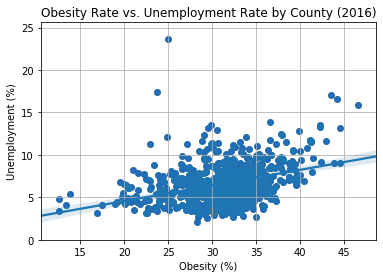

In [610]:
#Obesity vs Unemployment
#obtain the x and y coordinates for x and y coordinates

#get limits for x axis
x_limit_min = sample["Obesity (%)"].min()
# x_limit_min
x_limit_max = sample["Obesity (%)"].max()
# x_limit_max


#graphing for Obesity vs Unemployment
#max unemployment limits
unemp_limit_min = sample["Unemployment (%)"].min()
# unemp_limit_min
unemp_limit_max = sample["Unemployment (%)"].max()
# unemp_limit_max

#Obesity vs Unemployment
obesity_vs_unemp = plt.scatter(sample["Obesity (%)"], sample["Unemployment (%)"], marker="o", 
                               facecolors="blue", edgecolors="black", s=30, alpha=0.75)
plt.scatter

# Incorporate the other graph properties

# Set your x and y limits
plt.xlim(x_limit_min-2, x_limit_max+2)
plt.ylim(0, unemp_limit_max+2)

#label x and y axis

plt.xlabel("Obesity (%)")
plt.ylabel("Unemployment (%)")

#add header
plt.title(f"Obesity Rate vs. Unemployment Rate by County (2016)")

#add trendline
sns.regplot(sample["Obesity (%)"],sample["Unemployment (%)"])


# Set a grid on the plot
plt.grid()

# Save Figure
plt.savefig("Obesity_vs_Unemployment.png")

# Show plot
plt.show()


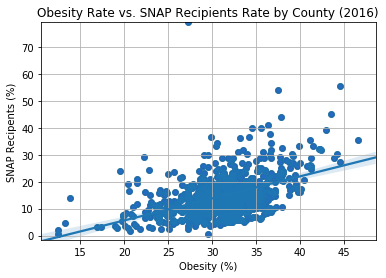

In [611]:
#Obesity vs SNAP Recipients
#obtain the x and y coordinates for x and y coordinates

#get limits for x axis
x_limit_min = sample["Obesity (%)"].min()
# x_limit_min
x_limit_max = sample["Obesity (%)"].max()
# x_limit_max


#graphing for Obesity vs SNAP Recipients
#max SNAP Recipients limits
snap_limit_min = sample["SNAP Recipents (%)"].min()
# unemp_limit_min
snap_limit_max = sample["SNAP Recipents (%)"].max()
# unemp_limit_max

#Obesity vs SNAP Recipients
obesity_vs_snap = plt.scatter(sample["Obesity (%)"], sample["SNAP Recipents (%)"], marker="o", 
                               facecolors="blue", edgecolors="black", s=30, alpha=0.75)
plt.scatter

# Incorporate the other graph properties

# Set your x and y limits
plt.xlim(x_limit_min-2, x_limit_max+2)
plt.ylim(snap_limit_min-2, snap_limit_max)

#label x and y axis

plt.xlabel("Obesity (%)")
plt.ylabel("SNAP Recipents (%)")

#add header
plt.title(f"Obesity Rate vs. SNAP Recipients Rate by County (2016)")

#add trendline
sns.regplot(sample["Obesity (%)"],sample["SNAP Recipents (%)"])


# Set a grid on the plot
plt.grid()

# Save Figure
plt.savefig("Obesity_vs_SNAP_Recipients.png")

# Show plot
plt.show()


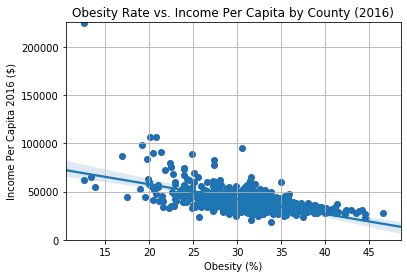

In [612]:
#Obesity vs Income Per Capita
#obtain the x and y coordinates for x and y coordinates

#get limits for x axis
x_limit_min = sample["Obesity (%)"].min()
# x_limit_min
x_limit_max = sample["Obesity (%)"].max()
# x_limit_max


#graphing for Obesity vs Income Per Capita
#max SNAP Recipients limits
income_limit_min = sample["Income Per Capita 2016 ($)"].min()
# unemp_limit_min
income_limit_max = sample["Income Per Capita 2016 ($)"].max()
# unemp_limit_max

#Obesity vs Income Per Capita
obesity_vs_income = plt.scatter(sample["Obesity (%)"], sample["Income Per Capita 2016 ($)"], marker="o", 
                               facecolors="blue", edgecolors="black", s=30, alpha=0.75)
plt.scatter

# Incorporate the other graph properties

# Set your x and y limits
plt.xlim(x_limit_min-2, x_limit_max+2)
plt.ylim(0, income_limit_max+1000)

#label x and y axis

plt.xlabel("Obesity (%)")
plt.ylabel("Income Per Capita ($)")

#add header
plt.title(f"Obesity Rate vs. Income Per Capita by County (2016)")

#add trendline
sns.regplot(sample["Obesity (%)"],sample["Income Per Capita 2016 ($)"])


# Set a grid on the plot
plt.grid()

# Save Figure
plt.savefig("Obesity_vs_Income_Per_Capita.png")

# Show plot
plt.show()


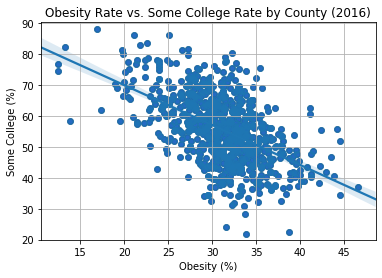

In [613]:
#Obesity vs Some College
#obtain the x and y coordinates for x and y coordinates

#get limits for x axis
x_limit_min = sample["Obesity (%)"].min()
# x_limit_min
x_limit_max = sample["Obesity (%)"].max()
# x_limit_max


#graphing for Obesity vs Some College
#max Some College limits
college_limit_min = sample["Some College (%)"].min()
# unemp_limit_min
college_limit_max = sample["Some College (%)"].max()
# unemp_limit_max

#Obesity vs Some College
obesity_vs_college = plt.scatter(sample["Obesity (%)"], sample["Some College (%)"], marker="o", 
                               facecolors="blue", edgecolors="black", s=30, alpha=0.75)
plt.scatter

# Incorporate the other graph properties

# Set your x and y limits
plt.xlim(x_limit_min-2, x_limit_max+2)
plt.ylim(college_limit_min-2, college_limit_max+2)

#label x and y axis

plt.xlabel("Obesity (%)")
plt.ylabel("Some College (%)")

#add header
plt.title(f"Obesity Rate vs. Some College Rate by County (2016)")

#add trendline
sns.regplot(sample["Obesity (%)"],sample["Some College (%)"])


# Set a grid on the plot
plt.grid()

# Save Figure
plt.savefig("Obesity_vs_Some_College.png")

# Show plot
plt.show()


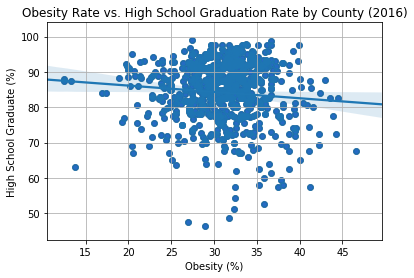

In [614]:
#Obesity vs High School Graduate
#obtain the x and y coordinates for x and y coordinates

#get limits for x axis
x_limit_min = sample["Obesity (%)"].min()
# x_limit_min
x_limit_max = sample["Obesity (%)"].max()
# x_limit_max


#graphing for Obesity vs High School Graduate
#max High School Graduate limits
hs_limit_min = sample["High School Graduate (%)"].min()
# unemp_limit_min
hs_limit_max = sample["High School Graduate (%)"].max()
# unemp_limit_max

#Obesity vs High School Graduate
obesity_vs_hs = plt.scatter(sample["Obesity (%)"], sample["High School Graduate (%)"], marker="o", 
                               facecolors="blue", edgecolors="black", s=30, alpha=0.75)
plt.scatter

# Incorporate the other graph properties

# Set your x and y limits
plt.xlim(x_limit_min-2, x_limit_max+3)
plt.ylim(hs_limit_min+40, hs_limit_max+5)

#label x and y axis

plt.xlabel("Obesity (%)")
plt.ylabel("High School Graduate (%)")

#add header
plt.title(f"Obesity Rate vs. High School Graduation Rate by County (2016)")

#add trendline
sns.regplot(sample["Obesity (%)"],sample["High School Graduate (%)"])


# Set a grid on the plot
plt.grid()

# Save Figure
plt.savefig("Obesity_vs_hs_grad.png")

# Show plot
plt.show()

In [615]:
#Inital Regression Analysis
X = sample[["Unemployment (%)", "SNAP Recipents (%)", "Income Per Capita 2016 ($)", 
            "Some College (%)", "High School Graduate (%)"]]
y = sample["Obesity (%)"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Obesity (%)   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     106.5
Date:                Tue, 03 Sep 2019   Prob (F-statistic):           1.15e-84
Time:                        17:47:21   Log-Likelihood:                -2002.9
No. Observations:                 745   AIC:                             4018.
Df Residuals:                     739   BIC:                             4045.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         36.4636      1.797     20.290      0.000      32.936      39.992
Unemployment (%)               0.0046      0.076      0.060      0.952      -0.145       0.154
SNAP Recipents (%)             0.1324      0.025      5.376      0.000       0.084       0.181
Income Per Capita 2016 ($)    -0.0001   1.33e-05     -9.576      0.000      -0.000      -0.000
Some College (%)              -0.0936      0.015     -6.086      0.000      -0.124      -0.063
High School Graduate (%)       0.0352      0.015      2.413      0.016       0.007       0.064
==============================================================================
Omnibus:                       23.828   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.858
Skew:                          -0.330   Prob(JB):                     1.99e-07
Kurtosis:                       3.746   Cond. No.                     5.82e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [616]:
#Revised Regression analysis to remove unemployment due to unstable relationship after running multiple samples and 
#to address multicollinearity issue
X = sample[["SNAP Recipents (%)", "Income Per Capita 2016 ($)", "Some College (%)"]]
y = sample["Obesity (%)"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Obesity (%)   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     174.7
Date:                Tue, 03 Sep 2019   Prob (F-statistic):           1.18e-85
Time:                        17:47:21   Log-Likelihood:                -2005.8
No. Observations:                 745   AIC:                             4020.
Df Residuals:                     741   BIC:                             4038.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         39.8703      0.981     40.643      0.000      37.944      41.796
SNAP Recipents (%)             0.1157      0.020      5.716      0.000       0.076       0.155
Income Per Capita 2016 ($)    -0.0001   1.33e-05     -9.518      0.000      -0.000      -0.000
Some College (%)              -0.0969      0.015     -6.413      0.000      -0.127      -0.067
==============================================================================
Omnibus:                       23.846   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.117
Skew:                          -0.340   Prob(JB):                     2.88e-07
Kurtosis:                       3.713   Cond. No.                     3.17e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.17e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [617]:
#Final Regression analysis to comparing SNAP percentage and some college to address multicollinearity issue
X = sample[["SNAP Recipents (%)", "Some College (%)"]]
y = sample["Obesity (%)"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Obesity (%)   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     193.4
Date:                Tue, 03 Sep 2019   Prob (F-statistic):           2.47e-68
Time:                        17:47:21   Log-Likelihood:                -2048.8
No. Observations:                 745   AIC:                             4104.
Df Residuals:                     742   BIC:                             4117.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 37.4790      1.004     37.333      0.000      35.508      39.450
SNAP Recipents (%)     0.1674      0.021      8.113      0.000       0.127       0.208
Some College (%)      -0.1596      0.014    -11.079      0.000      -0.188      -0.131
==============================================================================
Omnibus:                       35.645   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.022
Skew:                          -0.458   Prob(JB):                     1.67e-10
Kurtosis:                       3.782   Cond. No.                         423.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

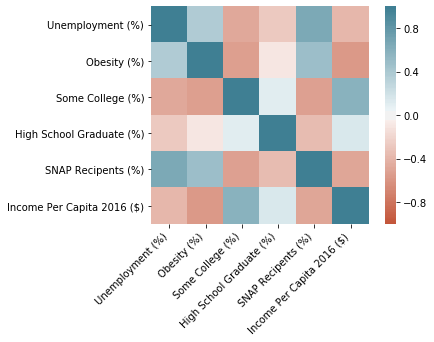

In [618]:
#Correlation Matrix plots
corr = sample.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# Save Figure
plt.savefig("Obesity_Correlation_Matrix.png")

# Show plot
plt.show()
